**Kernel**
- [Mall Customers Clustering Analysis](https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis)

**Dataset**
- [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

## Installing the Libraries

In [47]:
# for basic mathematics operation
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
print(os.listdir('data/'))

['Mall_Customers.csv']


## Reading the Dataset

In [48]:
# importing the dataset
data = pd.read_csv('data/Mall_Customers.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [49]:
# describing the data

desc = ff.create_table(data.describe())
py.iplot(desc)

In [50]:
# checking if there is any NULL data

data.isnull().any().any()

False

## Data Visualization

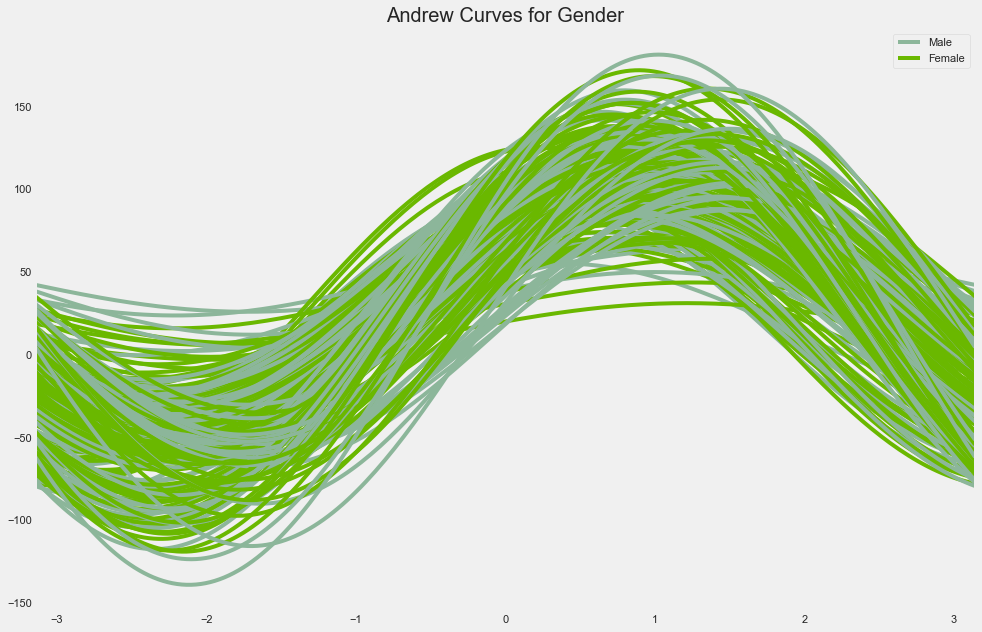

In [51]:
plt.rcParams['figure.figsize'] = (15, 10)

plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title("Andrew Curves for Gender", fontsize=20)
plt.show()

Andrews 곡선은 평균, 거리(상수까지) 및 편차를 보존할 수 있다는 것을 보여주고 있습니다. 즉, 서로 가까운 기능으로 표현되는 Andrews 곡선은 해당 데이터 지점도 서로 근접함을 나타냅니다.

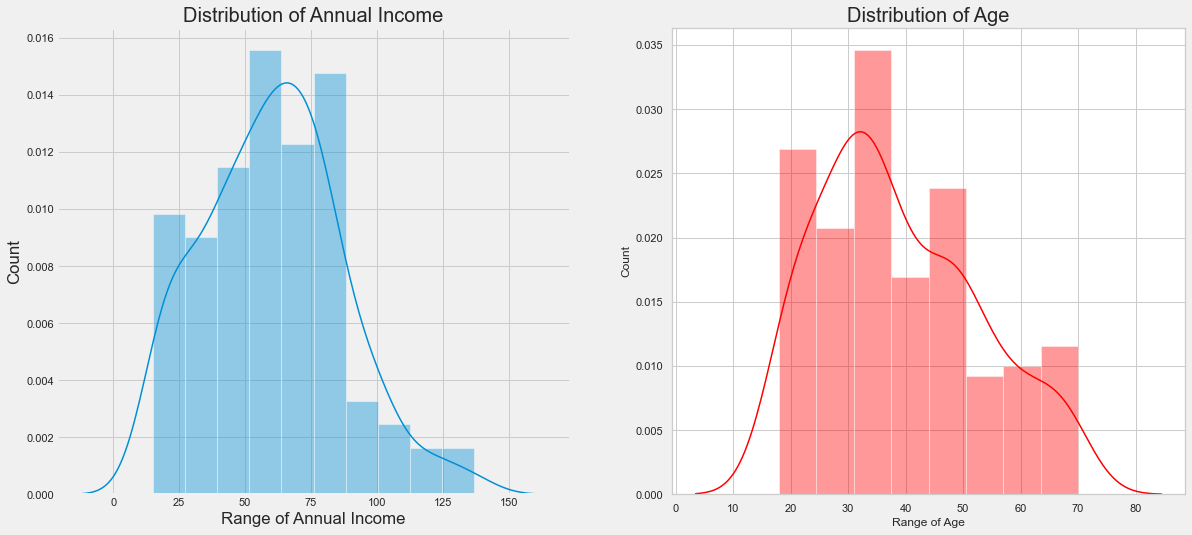

In [52]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style='whitegrid')
sns.distplot(data['Age'], color='red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

위의 그림에서 연간 소득과 연령의 분포 패턴을 볼 수 있습니다.

그림을 보면, 100달러 이상을 버는 사람이 거의 없다는 것을 추론할 수 있습니다. 대부분의 사람들은 미화 50~75달러를 벌고 최소 수입은 20달러 정도라고 말할 수 있습니다.

이 쇼핑몰의 단골손님들은 30세에서 35세 사이이다. 반면에 노년층은 쇼핑몰에서 가장 덜 자주 방문하며, 청년층은 중년층에 비해 수가 적다.

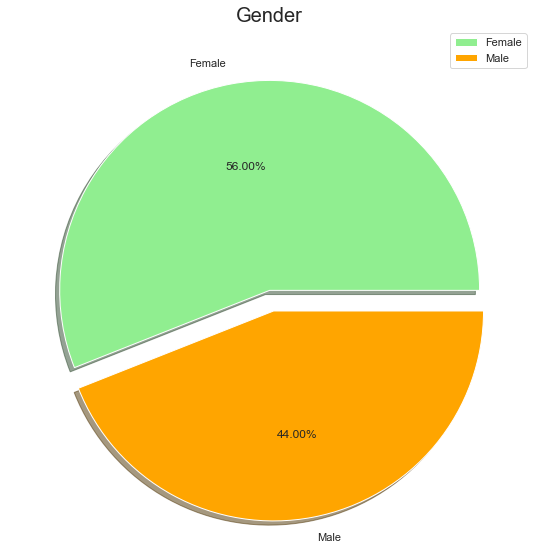

In [53]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

쇼핑몰 내 성별 분포에 대해 설명하는 위의 원형 차트를 살펴봅니다.

여성의 비율이 56%, 남성의 비율은 44% 입니다 

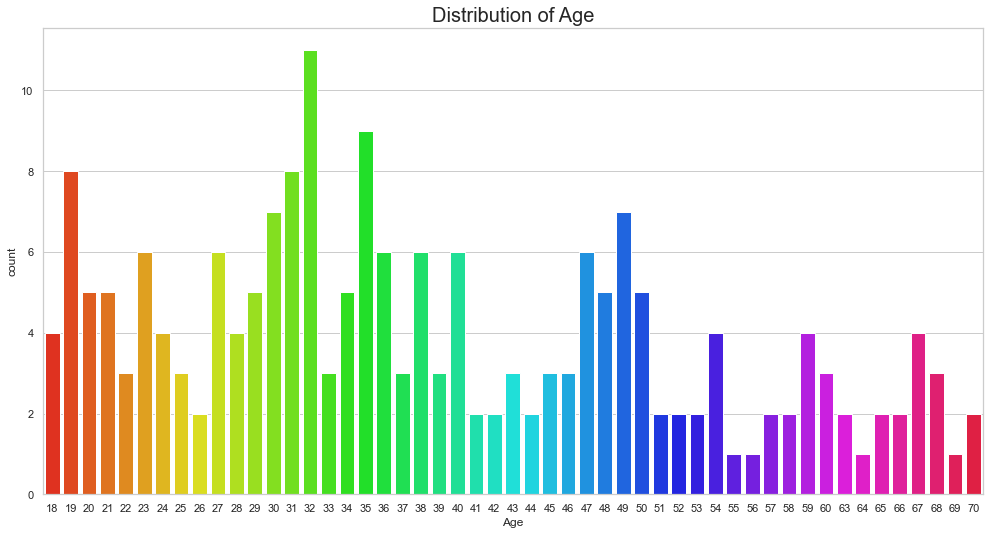

In [54]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette='hsv')
plt.title('Distribution of Age', fontsize=20)
plt.show()

이 그래프는 쇼핑몰 내 각 연령 그룹의 분포에 대한 대화형 차트를 보여줍니다.

위의 그래프를 보면, 27세에서 39세 사이의 연령이 매우 빈번하지만 뚜렷한 패턴은 보이지 않으며 노년층이 상대적으로 덜 빈번하다는 것을 알 수 있습니다. 흥미로운 사실은 18세와 67세의 방문객 수가 같다는 것입니다. 55세, 56세, 69세, 64세의 사람들은 쇼핑몰에 가장 적게 방문하고 32세의 사람들이 가장 자주 방문하는 사람들이다.

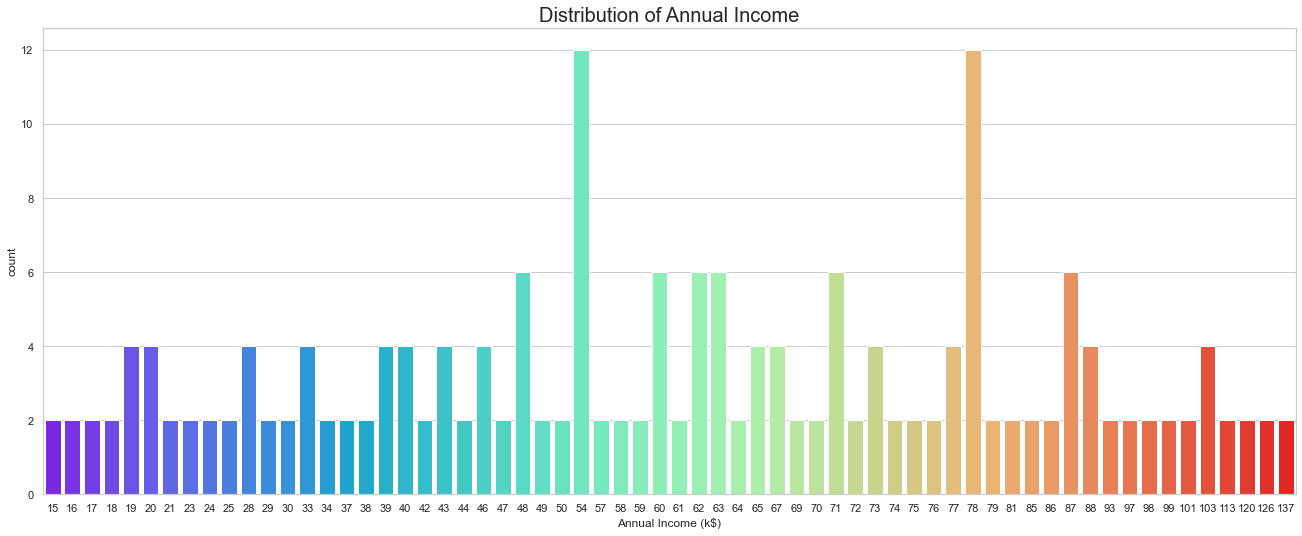

In [55]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette='rainbow')
plt.title('Distribution of Annual Income', fontsize=20)
plt.show()

이 그래프는 소득 수준의 분배를 더 잘 설명하기 위한 차트입니다. 흥미로운 것은 이 쇼핑몰에 15만 달러에서 137만 달러 사이의 범위에서 연간 수입이 매우 비슷한 고객들이 있다는 것입니다. 쇼핑몰에는 연소득이 54만 달러 또는 78만 달러인 고객이 많습니다.

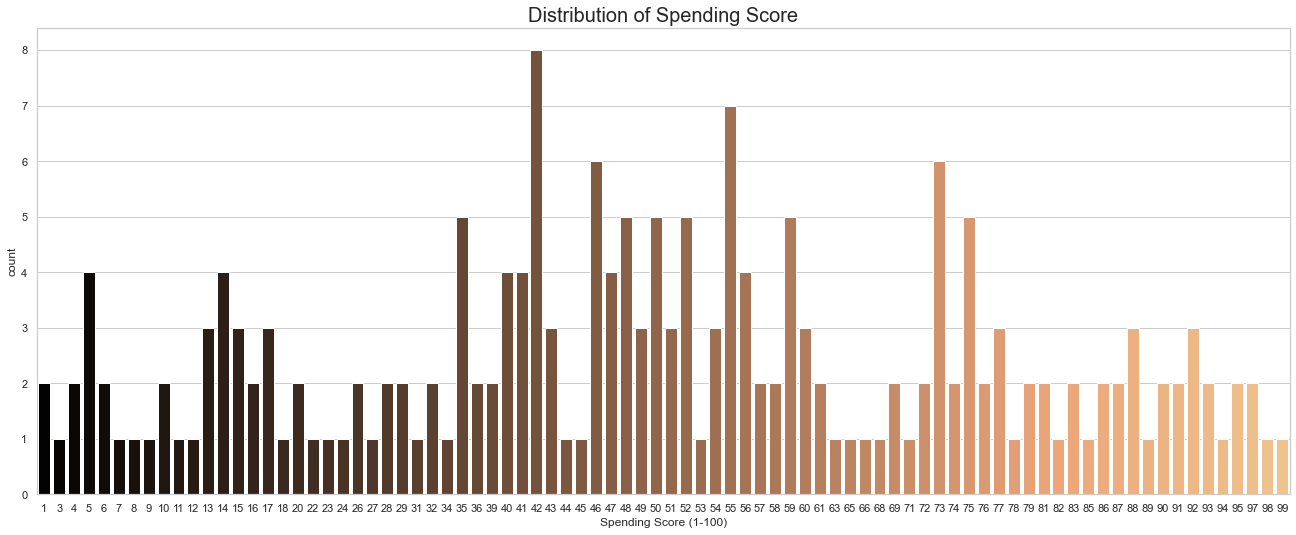

In [56]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette='copper')
plt.title('Distribution of Spending Score', fontsize=20)
plt.show()

쇼핑몰을 방문하는 고객의 지출 점수에 대한 직관력과 아이디어를 갖는 것이 매우 중요하기 때문에 이 차트는 쇼핑몰의 관점에서 가장 중요한 차트입니다.

일반적으로 대부분의 고객의 지출 점수는 35~60점이라고 결론내릴 수 있습니다. 흥미로운 점은 1점도 있고 99점도 있다는 것입니다. 이는 쇼핑몰이 다양한 요구사항을 가진 다양한 고객의 요구를 충족한다는 것을 보여줍니다.

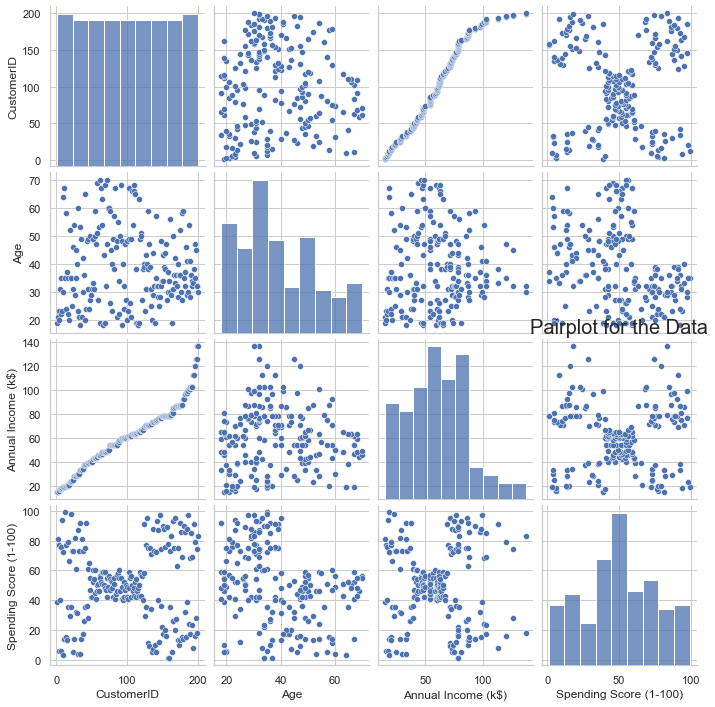

In [57]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize=20)
plt.show()

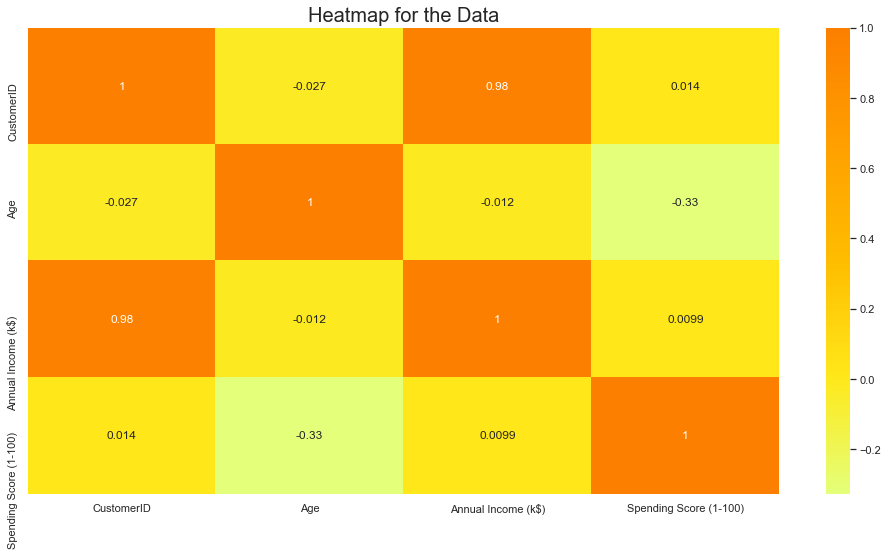

In [58]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap='Wistia', annot=True)
plt.title('Heatmap for the Data', fontsize=20)
plt.show()

Mall Customer Segmentation Dataset의 서로 다른 특성 간의 상관 관계를 보여 주는 그래프.

이 Heat map은 가장 상관 관계가 있는 기능은 주황색으로 가장 상관 관계가 적은 특징은 노란색으로 보여줍니다.

서로 간의 상관 관계가 좋지 않다는 것을 명확히 알 수 있기 때문에 모든 기능을 진행하려고 합니다.

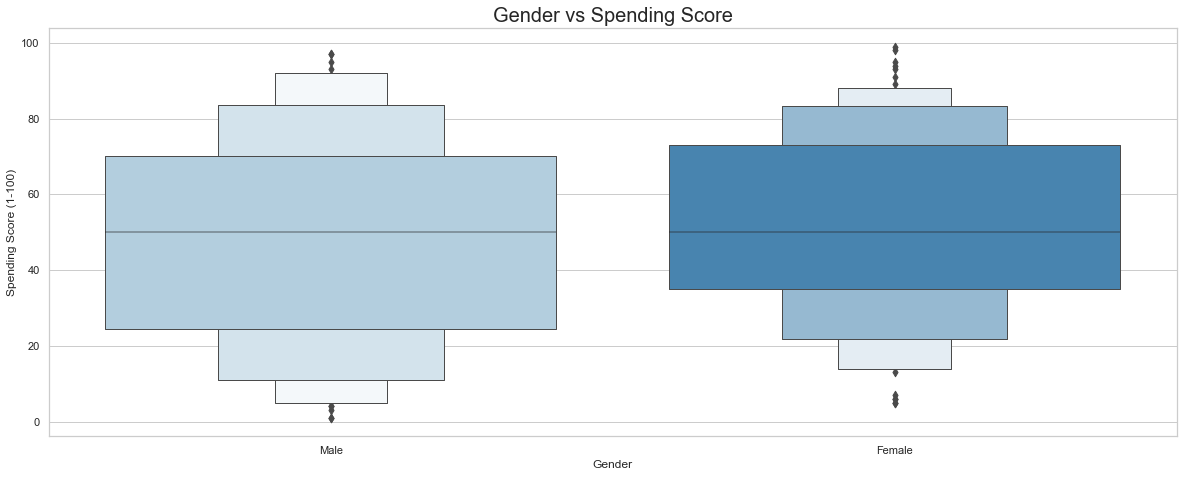

In [59]:
# Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette='Blues')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

**성별과 지출 점수 간의 이변 분석**

대부분의 남성이 지출비용이 약 25만 ~ 70만 달러인 반면 여성은 약 35 ~ 75만 달러인 것으로 나타났습니다. 여성들이 쇼핑의 선두주자라는 사실을 다시 한 번 말해줍니다.

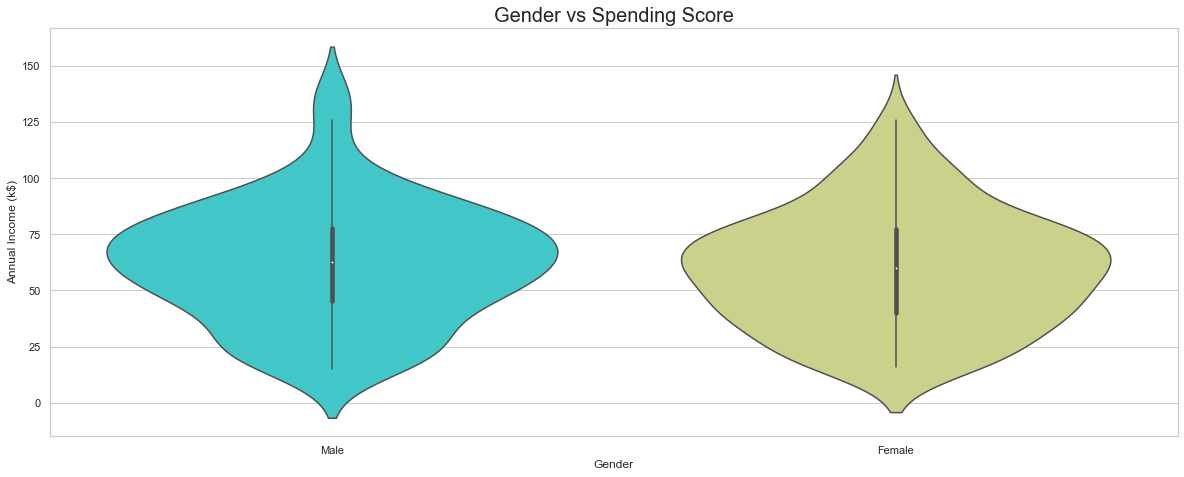

In [60]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette='rainbow')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

성별과 연소득 간의 이변량 분석으로 다른 성별의 소득을 보다 잘 시각화한다.

여성보다 많은 월급을 받는 남성들이 더 많지만 낮은 연소득의 경우 남성과 여성의 수는 동일하다.

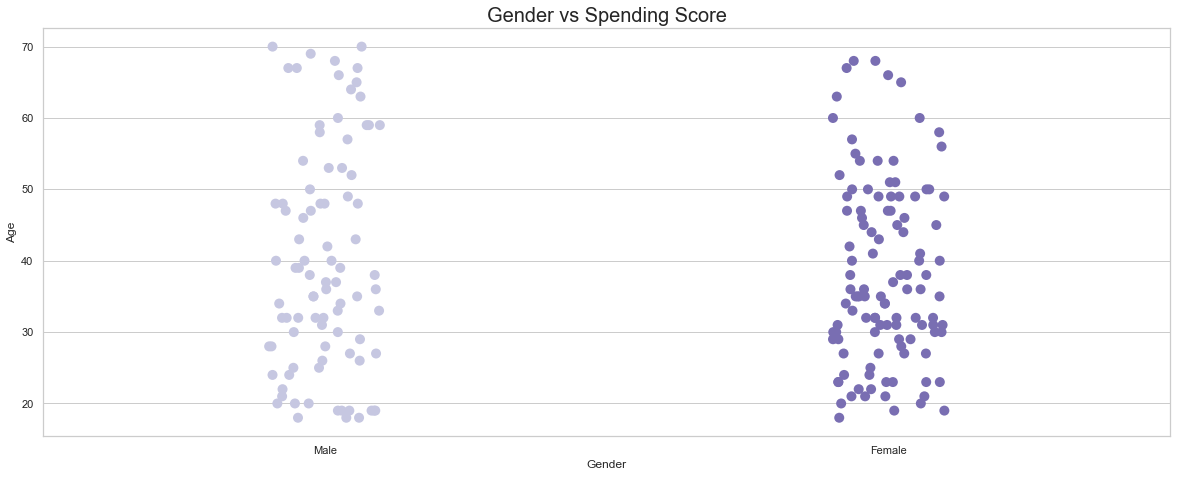

In [61]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette='Purples', size=10)
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

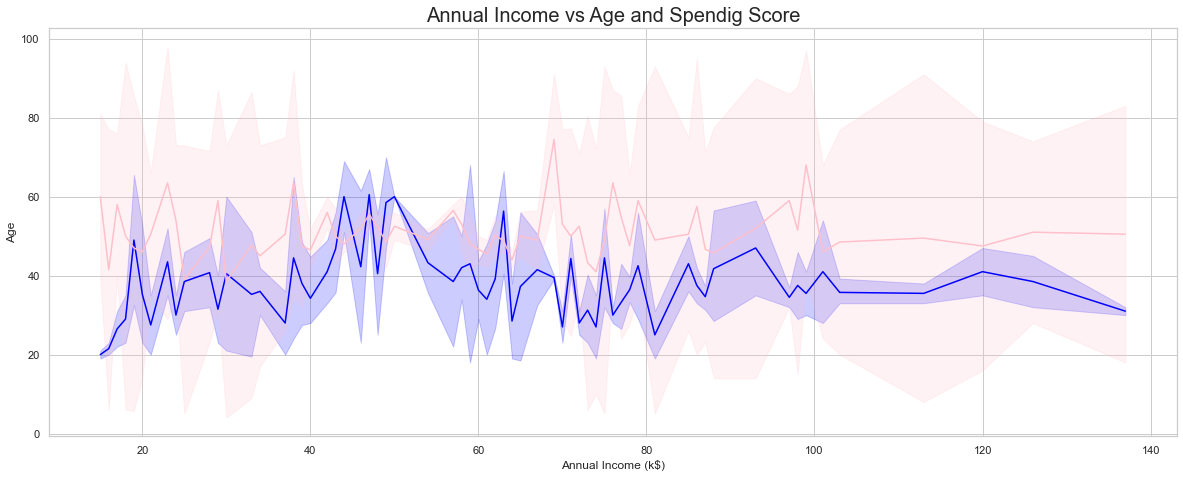

In [62]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color='blue')
sns.lineplot(x, z, color='pink')
plt.title('Annual Income vs Age and Spendig Score', fontsize=20)
plt.show()

파란색 선으로 표시된 연간 소득과 연령 사이의 플롯과 분홍색으로 표시된 연간 소득과 지출 점수 사이의 플롯에서는 연간 소득에 따라 연령 및 지출이 어떻게 달라지는지를 보여줍니다.

## Clustering Analysis

In [63]:
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


## Kmeans Algorithm

### The Elbow Method to find the No. of Optimal Clusters

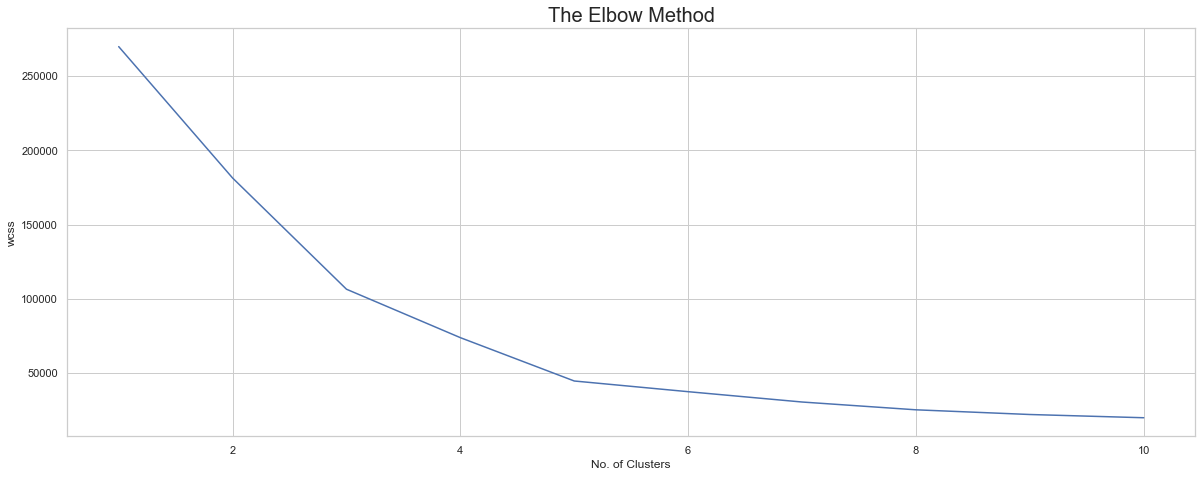

In [64]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### Visualizaing the Clusters

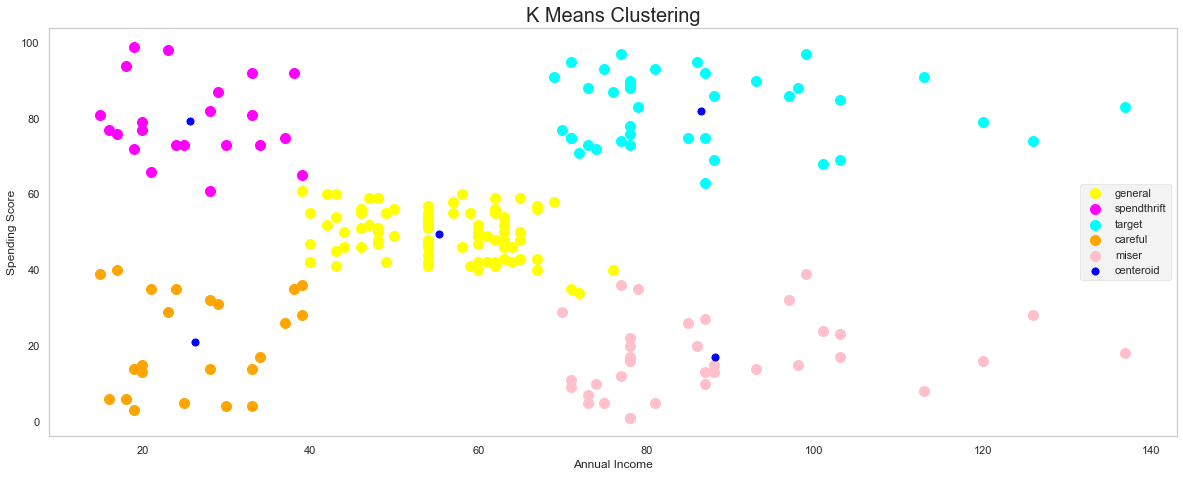

In [65]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

이 클러스터링 분석을 통해 쇼핑몰 내 고객의 다양한 부문에 대한 명확한 통찰력을 얻을 수 있습니다. 연간 소득 및 지출 점수를 기준으로 Miser, General, Target, Spendthrift, Careful 등 5개 부문의 고객이 분명히 있으며, 이는 쇼핑몰에서 고객의 부문을 결정하는 가장 좋은 요소/속성으로 알려져 있습니다.

## Hierarchial Clustering

계층적 클러스터 분석이라고도 하는 계층적 클러스터링은 유사한 개체를 클러스터라는 그룹으로 그룹화하는 알고리즘입니다. 끝점은 클러스터 집합으로, 각 클러스터는 서로 구분되며 각 클러스터 내의 개체는 서로 대체로 유사합니다.

### Using Dendrograms to find the no. of Optimal Clusters

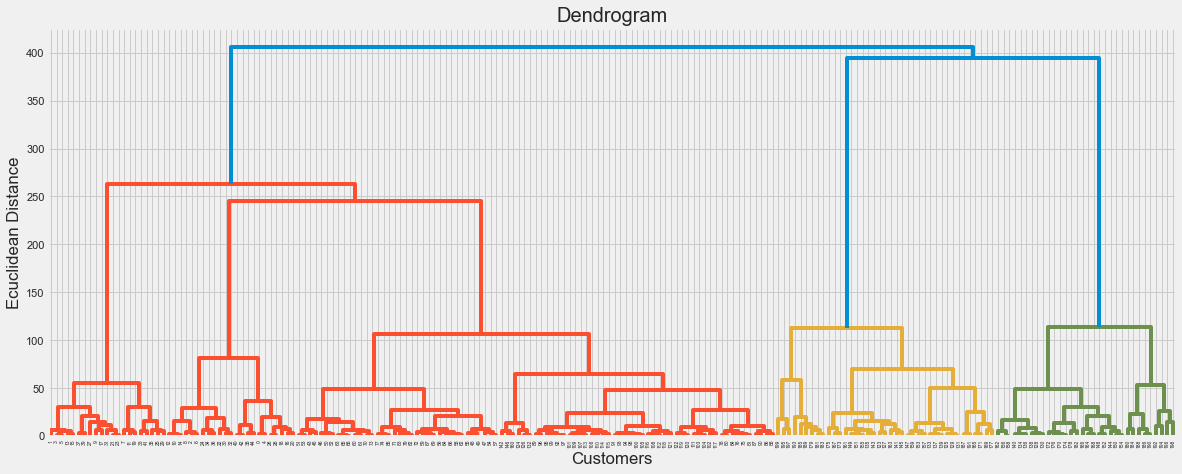

In [66]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

### Visualizing the Clusters of Hierarchial Clustering

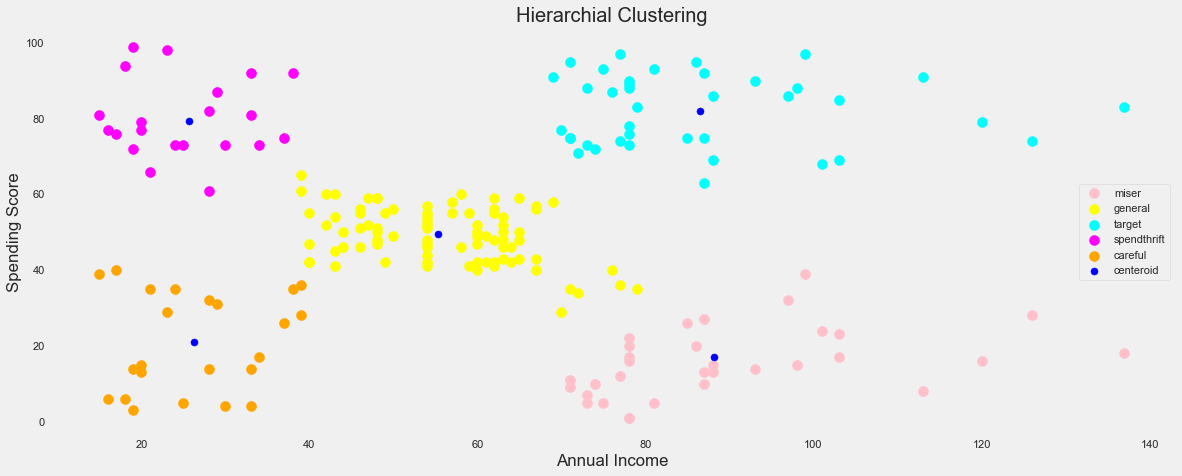

In [67]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Clusters of Customers Based on their Ages

In [68]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

### K-means Algorithm

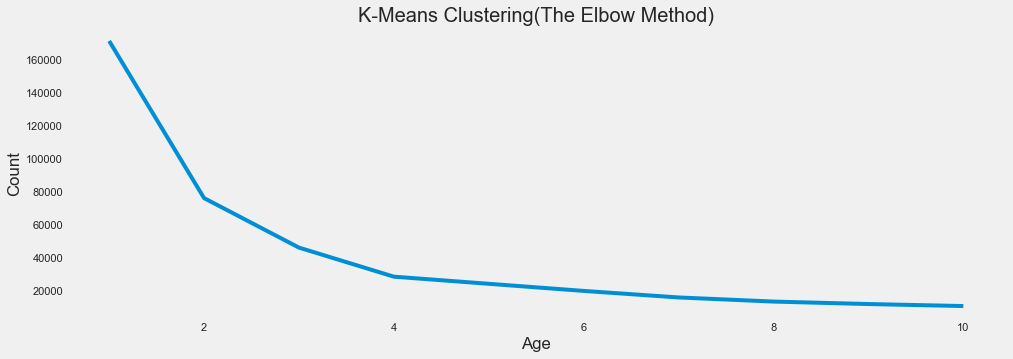

In [69]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

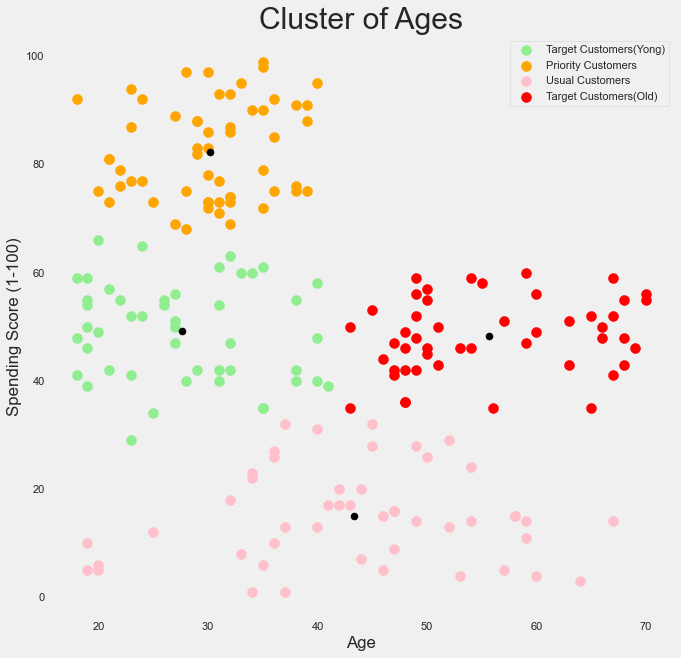

In [70]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize=30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Yong)')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Usual Customers')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

고객의 연령과 그에 상응하는 지출 점수에 대한 위의 클러스터링 그림을 보고 직관에 따라 고객을 4가지 다른 범주, 즉 Usual, Priority, Senior Citizen Target, Young Target 으로 집계했습니다. 그런 다음 결과를 얻은 후에는 쇼핑몰에서 고객의 지출 점수를 최적화하기 위해 다양한 마케팅 전략과 정책을 수립할 수 있습니다.

In [71]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [73]:
data['labels'] = labels
trace1 = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = data['labels'],
        size = 10,
        line = dict(
            color = data['labels'],
            width = 12
        ),
        opacity = 0.8
    )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin = dict(
        l = 0,
        r = 0, 
        b = 0,
        t = 0
    ),
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)